<a href="https://colab.research.google.com/github/brunobro/previsao-de-ataque-cardiaco-com-naive-bayes/blob/main/notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Previsão de Change de Ataque Cardíaco com Naive Bayes

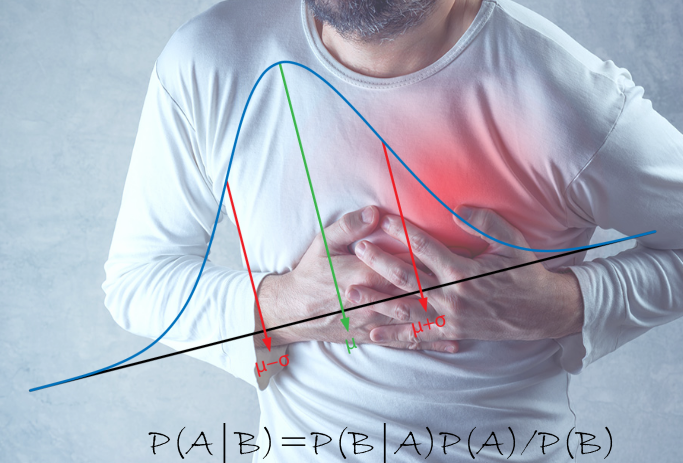

**Base de dados**

A base de dados utilizada está disponível no Kaggle: https://www.kaggle.com/rashikrahmanpritom/heart-attack-analysis-prediction-dataset

Nela temos as seguintes informações

Variáveis preditoras:
  * age: Idade do paciente

  * sex: Sexo do paciente

  * exang: angina induzida por exercício (1 = sim; 0 = não)

  * ca: número de grandes vasos (0-3)

  * cp: tipo de dor no peito (angina)

    * Valor 1: angina típica
    * Valor 2: angina atípica
    * Valor 3: dor não anginosa
    * Valor 4: assintomático

  * trtbps: pressão arterial em repouso (em mm Hg)
  * chol: colestoral em mg/dl obtido por meio do sensor de IMC
  * fbs: (açúcar no sangue em jejum> 120 mg / dl) (1 = verdadeiro; 0 = falso)
  * rest_ecg: resultados eletrocardiográficos em repouso
    * Valor 0: normal
    * Valor 1: tendo anormalidade da onda ST-T (inversões da onda T e / ou elevação ou depressão do ST> 0,05 mV)
    * Valor 2: mostrando hipertrofia ventricular esquerda provável ou definitiva pelos critérios de Estes
  * thalach: frequência cardíaca máxima alcançada

Variável predita:
  * 0 = menos chance de ataque cardíaco
  * 1 = mais chance de ataque cardíaco

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import display
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score
from sklearn.naive_bayes import GaussianNB

In [ ]:
#Lê o dataset os mostra um resumo
df = pd.read_csv('data.csv')

print('Estatísticas dos dados')
display(df.describe().round(2))

#Variável de saída
#Classes dos exemplos do dataset
y = df['output']
del df['output']

#Variáveis de entrada (preditoras)
Vars = list(df.columns)   #Nome das variáveis preditoras
x    = np.array(df)       #Variáveis preditoras: Índices de vegetação

#Separa os dados em treinamento, teste
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)

#Mostra a quantidade de exemplos
print('Quantidade de instâncias: %.d' %len(x))
print('Treinamento: %.d' %x_train.shape[0])
print('Teste: %.d' %x_test.shape[0])

Estatísticas dos dados


,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,303.00,303.00,303.00,303.00,303.00,303.00,303.00,303.00,303.00,303.00,303.00,303.00,303.00,303.00
mean,54.37,0.68,0.97,131.62,246.26,0.15,0.53,149.65,0.33,1.04,1.40,0.73,2.31,0.54
std,9.08,0.47,1.03,17.54,51.83,0.36,0.53,22.91,0.47,1.16,0.62,1.02,0.61,0.50
min,29.00,0.00,0.00,94.00,126.00,0.00,0.00,71.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,47.50,0.00,0.00,120.00,211.00,0.00,0.00,133.50,0.00,0.00,1.00,0.00,2.00,0.00
50%,55.00,1.00,1.00,130.00,240.00,0.00,1.00,153.00,0.00,0.80,1.00,0.00,2.00,1.00
75%,61.00,1.00,2.00,140.00,274.50,0.00,1.00,166.00,1.00,1.60,2.00,1.00,3.00,1.00
max,77.00,1.00,3.00,200.00,564.00,1.00,2.00,202.00,1.00,6.20,2.00,4.00,3.00,1.00


Quantidade de instâncias: 303
Treinamento: 212
Teste: 91


In [ ]:
#Separa os grupos em relação a chance de ataque cardíaco
#E mostra algumas estatísticas desses grupos
ataque_pos = []
ataque_neg = []

for i, ys in enumerate(y):
  if ys == 0:
    ataque_neg.append(x[i,:])
  else:
    ataque_pos.append(x[i,:])

#Cria dois dataframes para computar algumas estatísticas
df_pos = pd.DataFrame(data=ataque_pos, columns=Vars)
df_neg = pd.DataFrame(data=ataque_neg, columns=Vars)

print('Pacientes com mais change de ter ataque cardíaco')
display(df_pos.describe().round(2))

print()

print('Pacientes com menos change de ter ataque cardíaco')
display(df_neg.describe().round(2))

Pacientes com mais change de ter ataque cardíaco


,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall
count,165.00,165.00,165.00,165.00,165.00,165.00,165.00,165.00,165.00,165.00,165.00,165.00,165.00
mean,52.50,0.56,1.38,129.30,242.23,0.14,0.59,158.47,0.14,0.58,1.59,0.36,2.12
std,9.55,0.50,0.95,16.17,53.55,0.35,0.50,19.17,0.35,0.78,0.59,0.85,0.47
min,29.00,0.00,0.00,94.00,126.00,0.00,0.00,96.00,0.00,0.00,0.00,0.00,0.00
25%,44.00,0.00,1.00,120.00,208.00,0.00,0.00,149.00,0.00,0.00,1.00,0.00,2.00
50%,52.00,1.00,2.00,130.00,234.00,0.00,1.00,161.00,0.00,0.20,2.00,0.00,2.00
75%,59.00,1.00,2.00,140.00,267.00,0.00,1.00,172.00,0.00,1.00,2.00,0.00,2.00
max,76.00,1.00,3.00,180.00,564.00,1.00,2.00,202.00,1.00,4.20,2.00,4.00,3.00



Pacientes com menos change de ter ataque cardíaco


,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall
count,138.00,138.00,138.00,138.00,138.00,138.00,138.00,138.0,138.00,138.00,138.00,138.00,138.00
mean,56.60,0.83,0.48,134.40,251.09,0.16,0.45,139.1,0.55,1.59,1.17,1.17,2.54
std,7.96,0.38,0.91,18.73,49.45,0.37,0.54,22.6,0.50,1.30,0.56,1.04,0.68
min,35.00,0.00,0.00,100.00,131.00,0.00,0.00,71.0,0.00,0.00,0.00,0.00,0.00
25%,52.00,1.00,0.00,120.00,217.25,0.00,0.00,125.0,0.00,0.60,1.00,0.00,2.00
50%,58.00,1.00,0.00,130.00,249.00,0.00,0.00,142.0,1.00,1.40,1.00,1.00,3.00
75%,62.00,1.00,0.00,144.75,283.00,0.00,1.00,156.0,1.00,2.50,1.75,2.00,3.00
max,77.00,1.00,3.00,200.00,409.00,1.00,2.00,195.0,1.00,6.20,2.00,4.00,3.00


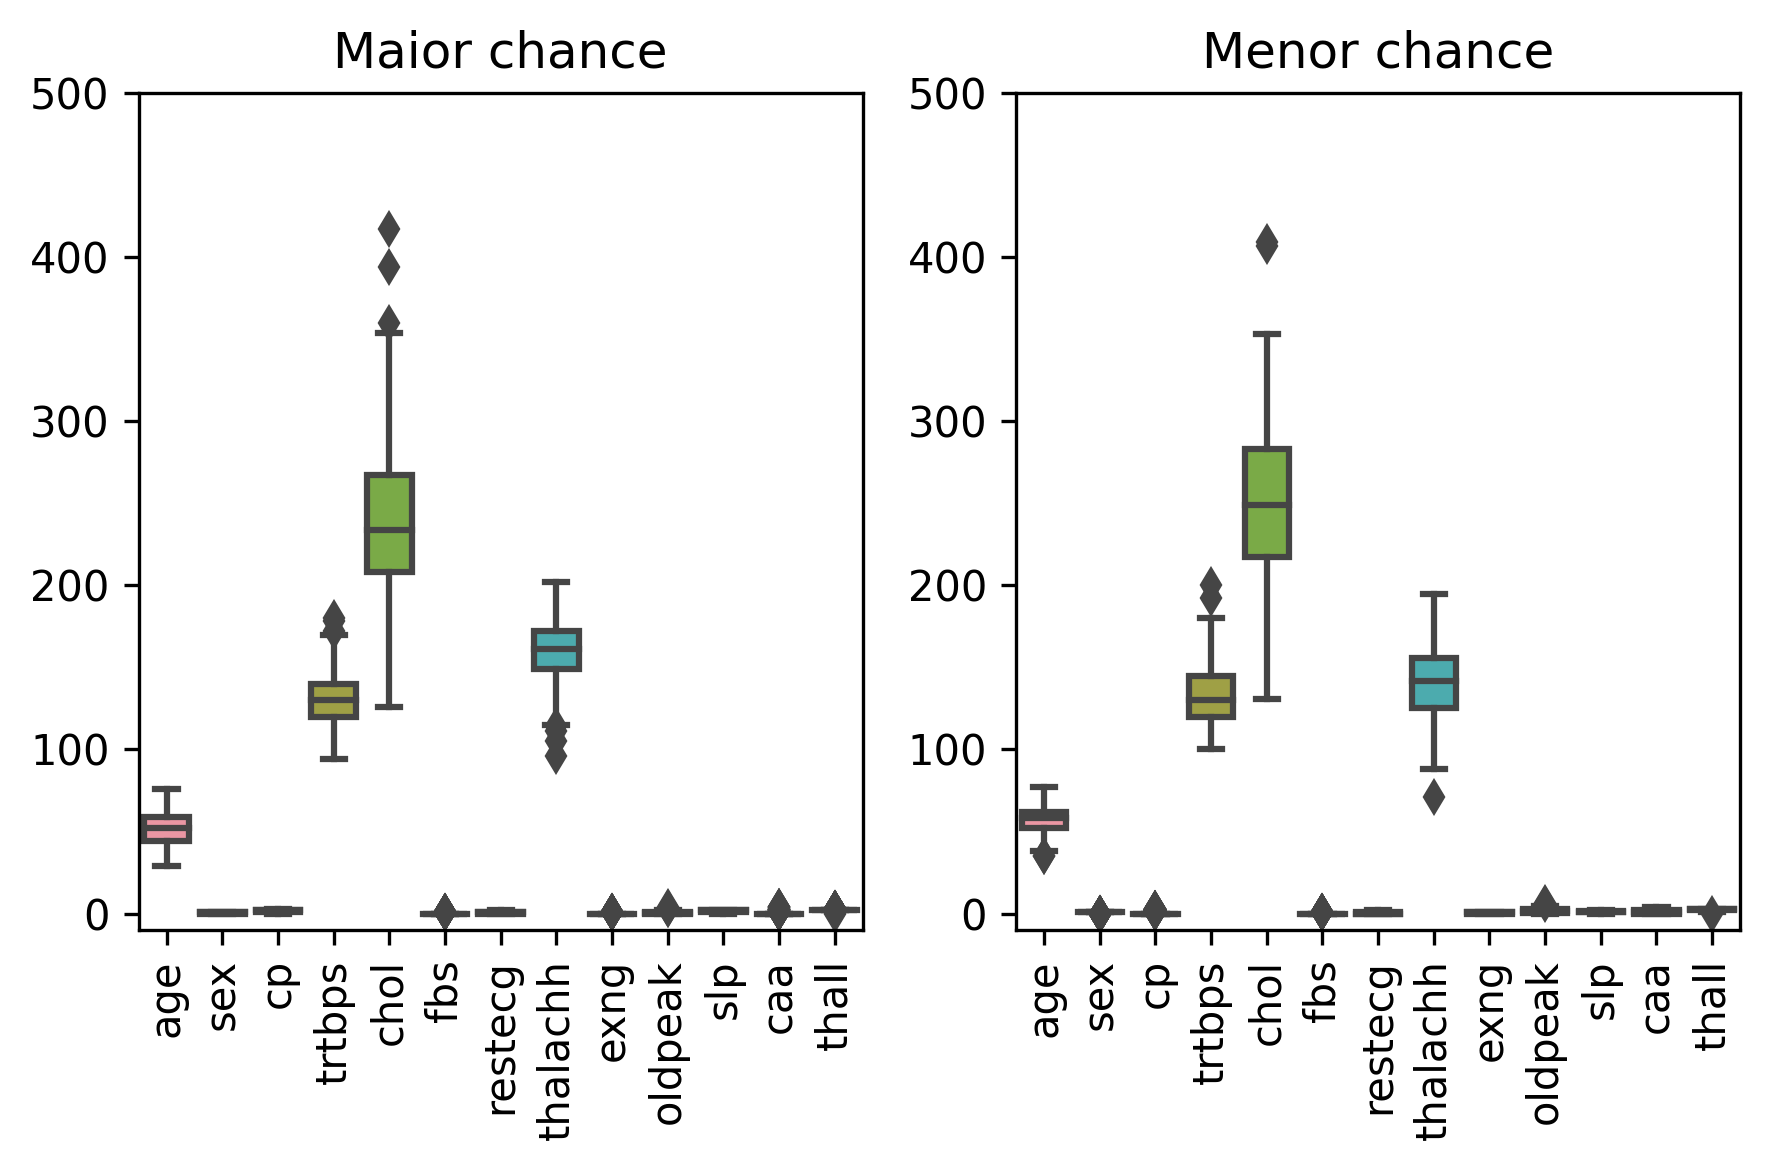

In [ ]:
#Boxplot dos grupos
plt.figure(dpi=300)
plt.subplot(121)
plt.title('Maior chance')
ax = sns.boxplot(data=df_pos)
plt.xticks(rotation='90')
plt.ylim([-10, 500])
plt.subplot(122)
plt.title('Menor chance')
ax = sns.boxplot(data=df_neg)
plt.xticks(rotation='90')
plt.ylim([-10, 500])
plt.tight_layout()
plt.show()

# Classificador Naive Bayes

Dado um vetor de atributos $\mathbf{x}$ e uma classe $C_k$, então a probabilidade de $\mathbf{x}$ ser da classe $C_k$ é dada por

$$
p(C_k | \mathbf{x}) = \dfrac{p(C_k) p(\mathbf{x} | C_k)}{p(\mathbf{x})}
$$

$$
\textrm{posterior} = \dfrac{\textrm{priori} \times \textrm{verossimilhança}}{\textrm{evidência}}
$$

Em um problema binário onde as classes são $C_0$ (classe negativa) e $C_1$ (classe positiva), então se, para uma certa instância $\mathbf{x}$ temos que $p(C_0 | \mathbf{x}) > p(C_1 | \mathbf{x})$, então $\mathbf{x}$ pertence a classe $C_0$, caso contrário percente a classe $C_1$.

Alternativamente, a classe predita é dada pela equação

$$
\hat{y} = \textrm{argmax}_{k \in \left\lbrace 0,1 \right \rbrace} p(C_k) \prod_{i=1}^{N}  p(x_i | C_k)
$$

onde $\hat{y}$ é uma estimação da classe verdadeira $y$; $x_i$ é o $i$-ésimo atributo do vetor $\mathbf{x}$ e $\textrm{argmax}$ retorna a argumento que fornece o máximo.

Para calcular as probabilidades é necessário escolher alguma distribuição dos dados. Uma das escolhas mais comum é a distribuição Gaussiana, para a qual a probabilidade é dada pela equação

$$
p(x_i | C_k) = \dfrac{1}{\sqrt{2\pi\sigma^{2}_k}} \exp{\left[-\dfrac{\left(x_i - \mu_k \right)^2}{2\sigma^{2}_k}\right]}
$$

onde os parâmetros $\sigma^{2}_k$ e $\mu_k$ são estimados a partir dos dados de treinamento para cada atributo.

In [ ]:
#Implementa um classificador Naive Bayes
clf = GaussianNB()
clf.fit(x_train, y_train)

#Faz as predições
y_pred = clf.predict(x_test)

#Calcula a acurácia e a precisão
acc = accuracy_score(y_test, y_pred)
pre = precision_score(y_test, y_pred)

print('Acurácia do modelo: %.4f' %acc)
print('Precisão do modelo: %.4f' %pre)

Acurácia do modelo: 0.8022
Precisão do modelo: 0.7736


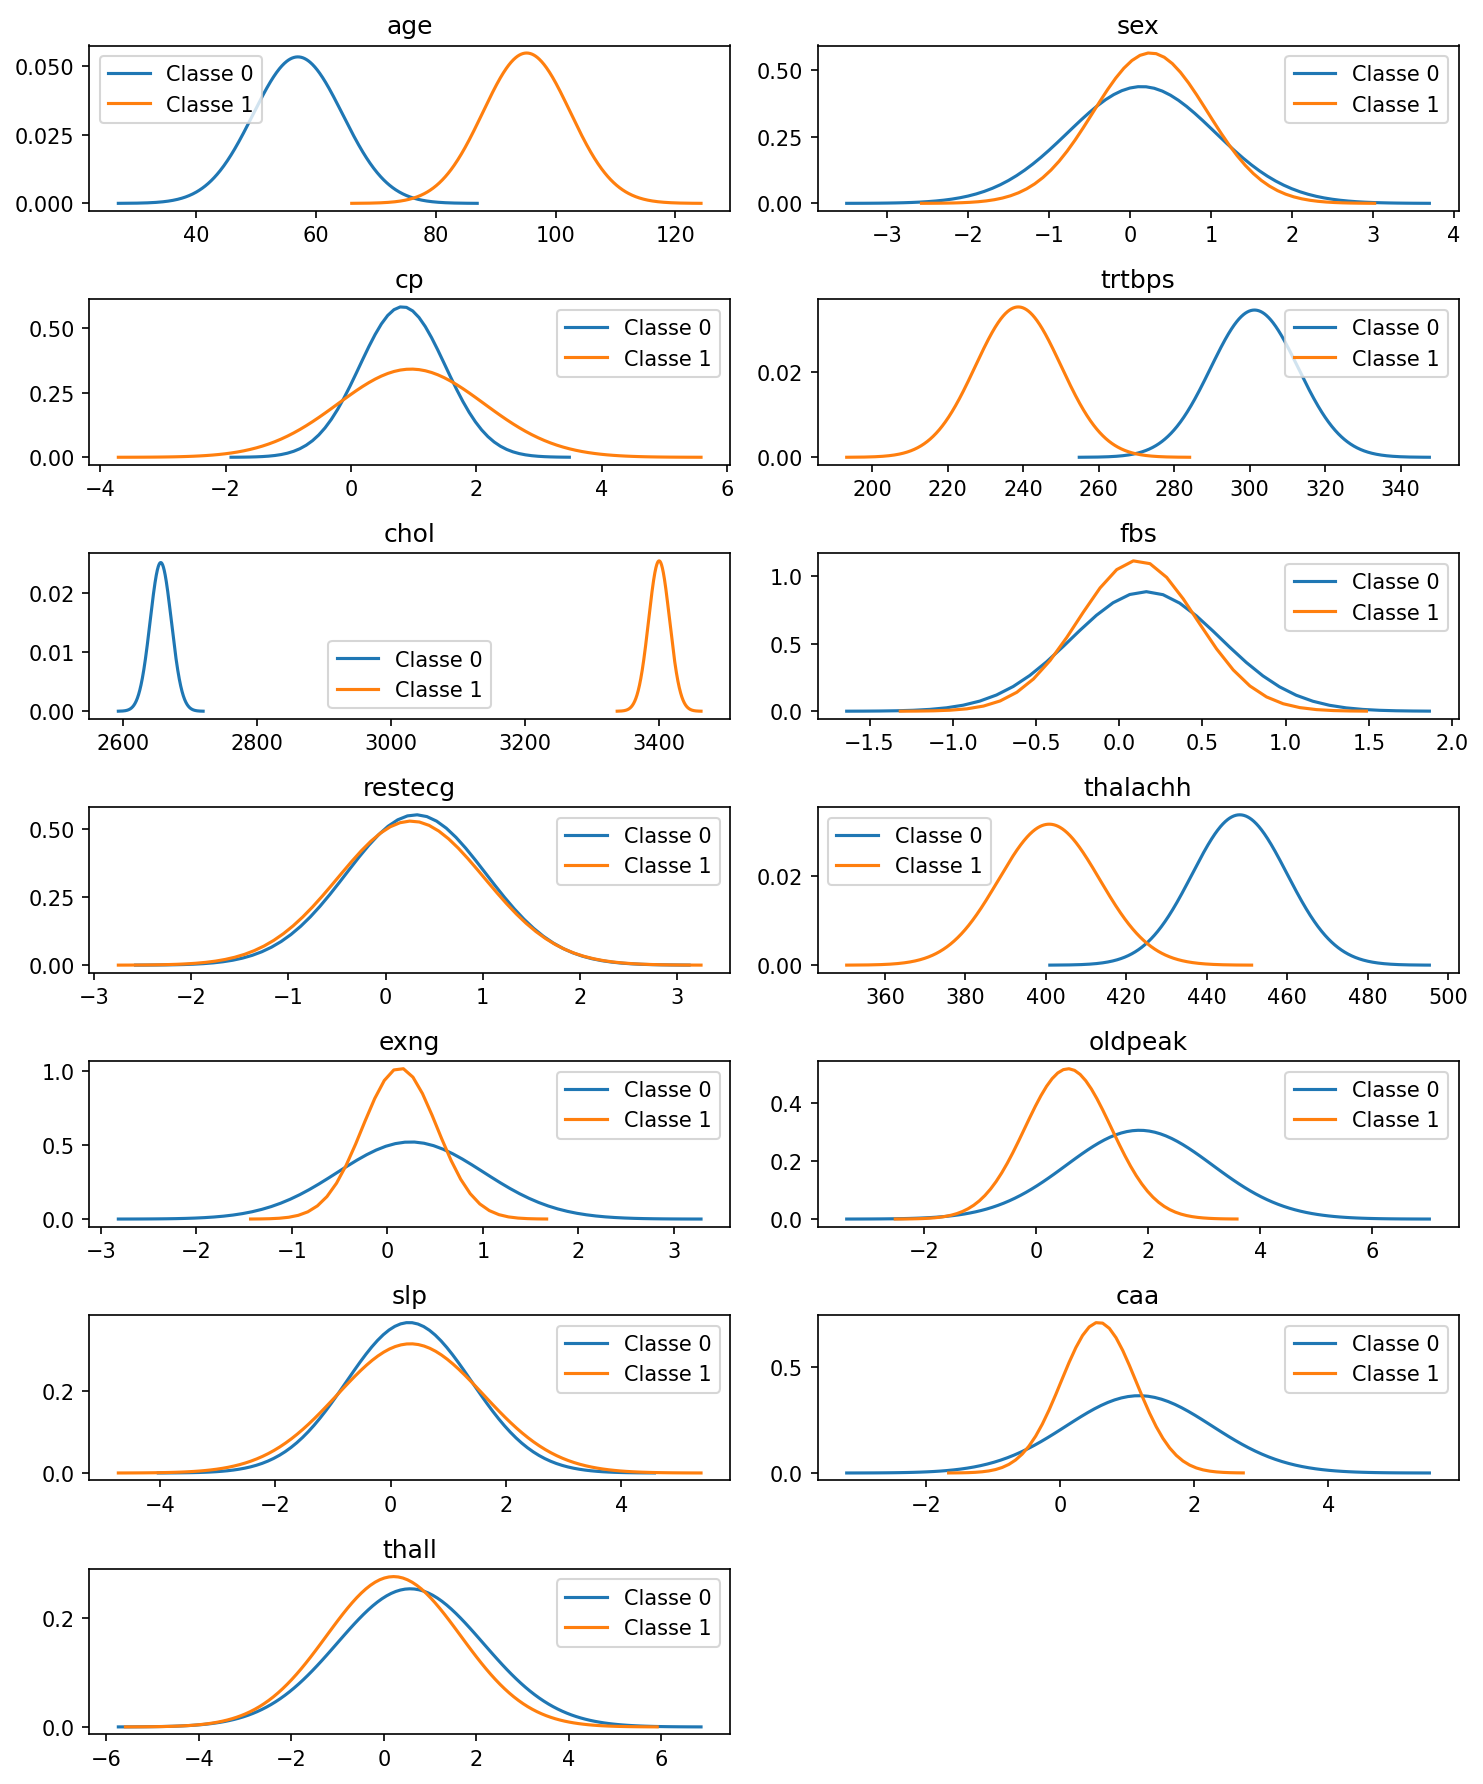

In [ ]:
#Mostra os as densidades de probabilidade para cada variável
import scipy.stats as stats

#Função Densidades de Probabilidade Gaussiana
def gaussian(mu, sigma):
  sigma2 = np.sqrt(sigma)
  x      = np.arange(mu - 4*sigma2, mu + 4*sigma2, 0.1)
  pdf    = stats.norm.pdf(x, mu, sigma2)
  return x, pdf

#Cria uma figura
plt.figure(dpi=150, figsize=(10, 12))

sigma = clf.sigma_ #variância
mu    = clf.theta_ #média
for i, v in enumerate(Vars):
  x0, pdf0 = gaussian(sigma[0][i], mu[0][i])
  x1, pdf1 = gaussian(sigma[1][i], mu[1][i])

  plt.subplot(7, 2, i + 1)
  plt.title(v)
  plt.plot(x0, pdf0, label='Classe 0')
  plt.plot(x1, pdf1, label='Classe 1')
  plt.legend()

plt.tight_layout()
plt.show()
  

In [ ]:
#Verifica alguns dados específicos
K = 30
ys_pred = clf.predict_proba(x_test[K,:].reshape(1, -1))

print('Um paciente que apresente as medidas')
for i, var in enumerate(Vars):
  print('%s: %.2f' %(var, x_test[K,i]))
print('tem uma probabilidade de %.4f%% de mais chance de ter um ataque cardíaco.' %(ys_pred[:, 1]*100))

Um paciente que apresente as medidas
age: 60.00
sex: 1.00
cp: 2.00
trtbps: 140.00
chol: 185.00
fbs: 0.00
restecg: 0.00
thalachh: 155.00
exng: 0.00
oldpeak: 3.00
slp: 1.00
caa: 0.00
thall: 2.00
tem uma probabilidade de 26.3371% de mais chance de ter um ataque cardíaco.


**Será o modelo acima o melhor possível para esses dados?**

O modelo induzido depende do espaço de atributos tomado para indução. Tomar outro espaço pode resultar em modelos melhores.

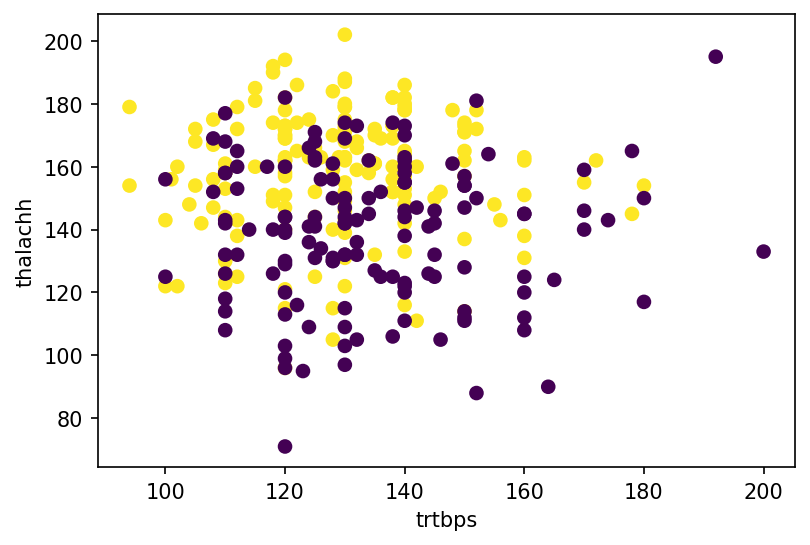

In [ ]:
#Gráfico de dispersão dos dados

plt.figure(dpi=150)
plt.scatter(x[:,3], x[:,7], c=y)
plt.xlabel(Vars[3])
plt.ylabel(Vars[7])
plt.show()

# Validação cruzada

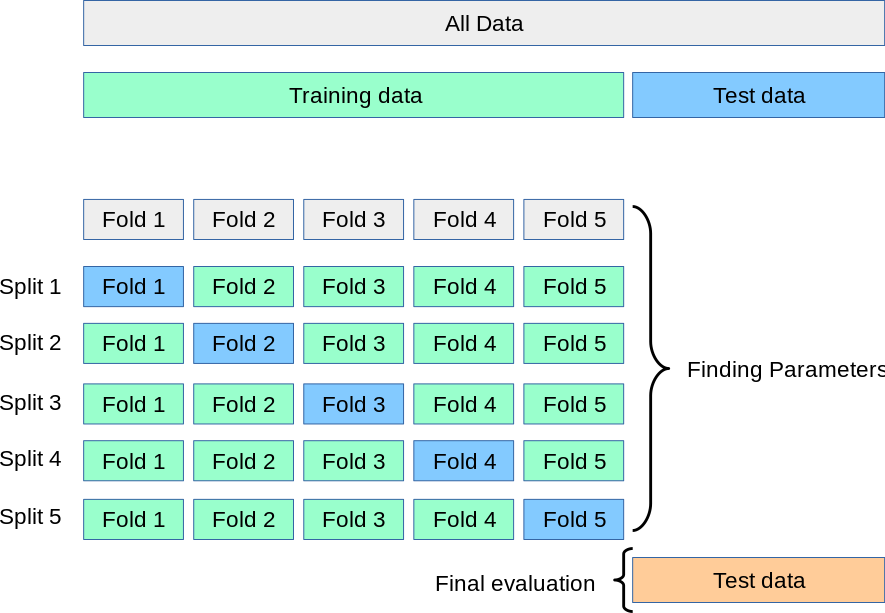

In [ ]:
from sklearn.model_selection import KFold

#Implementa validação cruzada para eliminar qualquer superajuste
kf = KFold(n_splits=30)

#armazena a maior acurácia
h_acc = 0

for train_index, test_index in kf.split(x):

    clf = GaussianNB()
    clf.fit(x[train_index], y[train_index])

    #Faz as predições
    y_pred = clf.predict(x[test_index])

    #Calcula a acurácia e a precisão
    acc = accuracy_score(y[test_index], y_pred)
    pre = precision_score(y[test_index], y_pred)

    if acc > h_acc:
      #para armazenar o melhor conjunto de treinamento
      best_set_x  = x[train_index]
      best_set_y  = y[train_index]
      other_set_x = x[test_index]
      other_set_y = y[test_index]

      h_acc = acc

    print('Acurácia do modelo: %.4f' %acc)
    print('Precisão do modelo: %.4f' %pre)
    print()

Acurácia do modelo: 0.8182
Precisão do modelo: 1.0000

Acurácia do modelo: 0.8182
Precisão do modelo: 1.0000

Acurácia do modelo: 0.9091
Precisão do modelo: 1.0000

Acurácia do modelo: 0.8000
Precisão do modelo: 1.0000

Acurácia do modelo: 0.8000
Precisão do modelo: 1.0000

Acurácia do modelo: 1.0000
Precisão do modelo: 1.0000

Acurácia do modelo: 0.8000
Precisão do modelo: 1.0000

Acurácia do modelo: 0.9000
Precisão do modelo: 1.0000

Acurácia do modelo: 0.7000
Precisão do modelo: 1.0000

Acurácia do modelo: 0.7000
Precisão do modelo: 1.0000

Acurácia do modelo: 0.9000
Precisão do modelo: 1.0000

Acurácia do modelo: 0.9000
Precisão do modelo: 1.0000

Acurácia do modelo: 0.9000
Precisão do modelo: 1.0000

Acurácia do modelo: 0.8000
Precisão do modelo: 1.0000

Acurácia do modelo: 0.9000
Precisão do modelo: 1.0000

Acurácia do modelo: 0.9000
Precisão do modelo: 1.0000

Acurácia do modelo: 0.6000
Precisão do modelo: 0.0000

Acurácia do modelo: 0.8000
Precisão do modelo: 0.0000

Acurácia d

In [ ]:
#Induz um novo modelo com o melhor conjunto
clf = GaussianNB()
clf.fit(best_set_x, best_set_y)

#Faz as predições
y_pred = clf.predict(other_set_x)

#Calcula a acurácia e a precisão
acc = accuracy_score(other_set_y, y_pred)
pre = precision_score(other_set_y, y_pred)

print('Acurácia do modelo: %.4f' %acc)
print('Precisão do modelo: %.4f' %pre)

Acurácia do modelo: 1.0000
Precisão do modelo: 1.0000
